In [1]:
from surprise import Dataset, Reader
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from surprise import accuracy, Dataset, SVD, KNNBasic, KNNWithMeans, KNNWithZScore
from surprise.model_selection import GridSearchCV
from surprise import Prediction
from collections import defaultdict

In [2]:
#Leggi Dati e dividi in trainset e testset
# DATABASE 1M contenente i rating
data = Dataset.load_builtin("ml-1m")

raw_ratings = data.raw_ratings

# shuffle ratings if you want
random.shuffle(raw_ratings)

# A = 80% of the data, B = 20% of the data
threshold = int(0.8 * len(raw_ratings))
A_raw_ratings = raw_ratings[:threshold]
B_raw_ratings = raw_ratings[threshold:]

data.raw_ratings = A_raw_ratings  # data is now the set A

# retrain on the whole set A
trainset = data.build_full_trainset()

# Compute unbiased accuracy on B
testset = data.construct_testset(B_raw_ratings)  # testset is now the set B

In [3]:
#TUNING KNNWithMeans User-based
# Select your best algo with grid search.
print("Grid Search...")
param_grid_u = {"k": range(30,50), "sim_options": {"name":["cosine","msd","pearson"], "user_based": [True],}, "verbose": [False]}
grid_search_u = GridSearchCV(KNNWithMeans, param_grid_u, measures=["rmse","mse","mae"], cv=3)
grid_search_u.fit(data)
algo_u = grid_search_u.best_estimator["rmse"]

Grid Search...


In [4]:
#risultati della GridSearch
risultatigs_u= pd.DataFrame.from_dict(grid_search_u.cv_results)
print(risultatigs_u)
print("best params: ")
print(grid_search_u.best_params)

    split0_test_rmse  split1_test_rmse  split2_test_rmse  mean_test_rmse  \
0           0.952535          0.949922          0.952711        0.951722   
1           0.943598          0.941193          0.943224        0.942672   
2           0.936358          0.933861          0.935563        0.935261   
3           0.951895          0.949261          0.951999        0.951051   
4           0.943055          0.940541          0.942629        0.942075   
5           0.935736          0.933312          0.934973        0.934673   
6           0.951377          0.948713          0.951263        0.950451   
7           0.942551          0.940134          0.942098        0.941594   
8           0.935119          0.932715          0.934433        0.934089   
9           0.950837          0.948139          0.950649        0.949875   
10          0.942017          0.939589          0.941493        0.941033   
11          0.934616          0.932218          0.933878        0.933571   
12          

C:\Users\Elia\AppData\Local\Temp\ipykernel_21748\3157579855.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


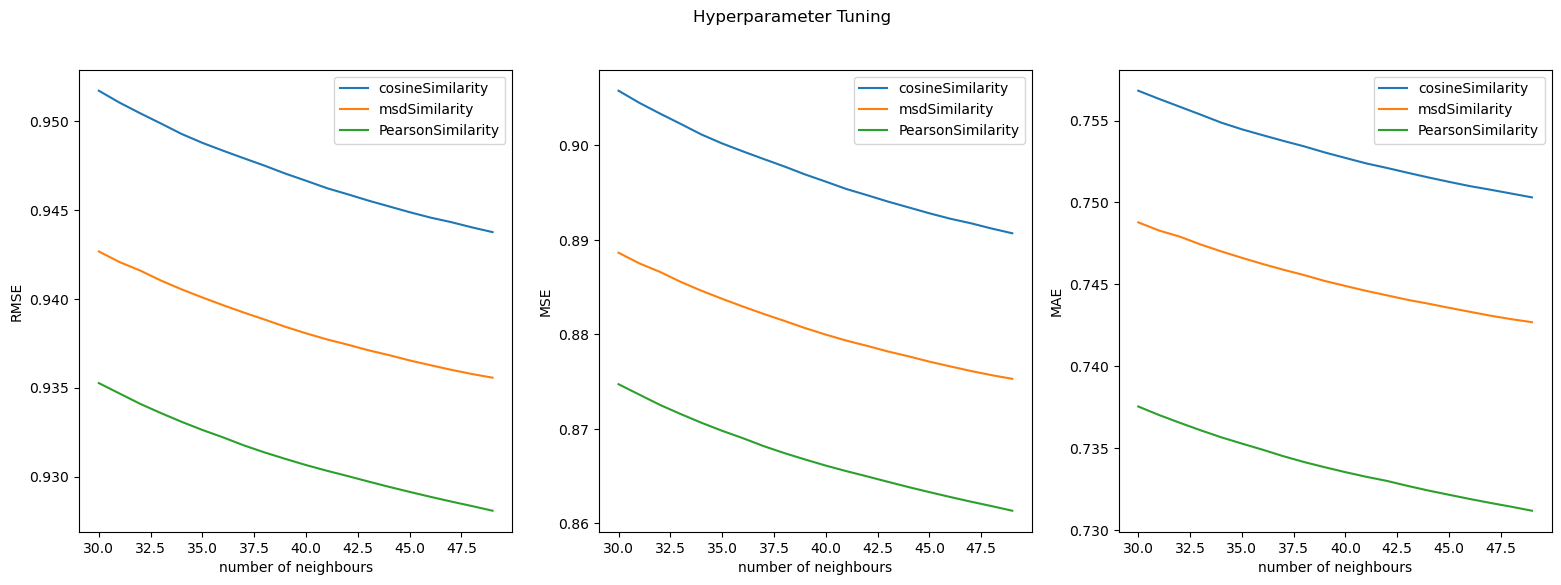

In [9]:
risCosine=risultatigs_u.loc[risultatigs_u['param_sim_options'] == {'name': 'cosine', 'user_based': True}]
risMsd=risultatigs_u.loc[risultatigs_u['param_sim_options'] == {'name': 'msd', 'user_based': True}]
risPearson=risultatigs_u.loc[risultatigs_u['param_sim_options'] == {'name': 'pearson', 'user_based': True}]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(19,6))
fig.suptitle('Hyperparameter Tuning')
ax1.plot(range(30,50), risCosine["mean_test_rmse"], label = "cosineSimilarity")
ax1.plot(range(30,50), risMsd["mean_test_rmse"], label = "msdSimilarity")
ax1.plot(range(30,50), risPearson["mean_test_rmse"], label = "PearsonSimilarity")
ax1.set(xlabel="number of neighbours", ylabel='RMSE')
ax1.legend()


ax2.plot(range(30,50), risCosine["mean_test_mse"], label = "cosineSimilarity")
ax2.plot(range(30,50), risMsd["mean_test_mse"], label = "msdSimilarity")
ax2.plot(range(30,50), risPearson["mean_test_mse"], label = "PearsonSimilarity")
ax2.set(xlabel="number of neighbours", ylabel='MSE')
ax2.legend()


ax3.plot(range(30,50), risCosine["mean_test_mae"], label = "cosineSimilarity")
ax3.plot(range(30,50), risMsd["mean_test_mae"], label = "msdSimilarity")
ax3.plot(range(30,50), risPearson["mean_test_mae"], label = "PearsonSimilarity")
ax3.set(xlabel="number of neighbours", ylabel='MAE')
ax3.legend()
fig.show()
fig.savefig('img\gridSearchKnnUser.jpg')

In [ ]:
#TUNING KNNWithMeans Item-based
# Select your best algo with grid search.
print("Grid Search...")
param_grid_i = {"k": range(30,50), "sim_options": {"name":["cosine","msd","pearson"], "user_based": [False],}, "verbose": [False]}
grid_search_i = GridSearchCV(KNNWithMeans, param_grid_u, measures=["rmse","mse","mae"], cv=3)
grid_search_i.fit(data)
algo_i = grid_search_i.best_estimator["rmse"]

In [ ]:
#risultati della GridSearch
risultatigs_i= pd.DataFrame.from_dict(grid_search_i.cv_results)
print(risultatigs_i)
print("best params: ")
print(grid_search_i.best_params)

In [ ]:
risCosine=risultatigs_i.loc[risultatigs_i['param_sim_options'] == {'name': 'cosine', 'user_based': False}]
risMsd=risultatigs_i.loc[risultatigs_i['param_sim_options'] == {'name': 'msd', 'user_based': False}]
risPearson=risultatigs_i.loc[risultatigs_i['param_sim_options'] == {'name': 'pearson', 'user_based': False}]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(19,6))
fig.suptitle('Hyperparameter Tuning')
ax1.plot(range(30,50), risCosine["mean_test_rmse"], label = "cosineSimilarity")
ax1.plot(range(30,50), risMsd["mean_test_rmse"], label = "msdSimilarity")
ax1.plot(range(30,50), risPearson["mean_test_rmse"], label = "PearsonSimilarity")
ax1.set(xlabel="number of neighbours", ylabel='RMSE')
ax1.legend()


ax2.plot(range(30,50), risCosine["mean_test_mse"], label = "cosineSimilarity")
ax2.plot(range(30,50), risMsd["mean_test_mse"], label = "msdSimilarity")
ax2.plot(range(30,50), risPearson["mean_test_mse"], label = "PearsonSimilarity")
ax2.set(xlabel="number of neighbours", ylabel='MSE')
ax2.legend()


ax3.plot(range(30,50), risCosine["mean_test_mae"], label = "cosineSimilarity")
ax3.plot(range(30,50), risMsd["mean_test_mae"], label = "msdSimilarity")
ax3.plot(range(30,50), risPearson["mean_test_mae"], label = "PearsonSimilarity")
ax3.set(xlabel="number of neighbours", ylabel='MAE')
ax3.legend()
fig.show()
fig.savefig('img\gridSearchKnnItem.jpg')